# Random forest predictions
This notebook ingests the positive and negative training vectors as well as the prediction set as generated by the notebook ``ExtractDifferenceVectors.ipynb``. It then perfoms Random forest learning and ranks the prediction set.

In [1]:
import pandas as pd
import os
import sys
import numpy as np
sys.path.insert(0, os.path.abspath('../..'))
from kcet import KcetParser
import pickle5 as pickle


In [2]:

prediction_pickle_path = "predictions.pkl"
positive_diff_pickle_path =  "positive-vectors.pkl"
negative_diff_pickle_path =  "negative-vectors.pkl"
with open(prediction_pickle_path, "rb") as fpred:
     diff_vectors_prediction = pickle.load(fpred)
with open(positive_diff_pickle_path, "rb") as fpos:        
    diff_vectors_pos = pickle.load(fpos)
with open(negative_diff_pickle_path, "rb") as fneg:    
    diff_vectors_neg = pickle.load(fneg)

In [3]:
diff_vectors_prediction.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ncbigene23552-meshd000008,0.708197,1.290104,0.561938,-0.099391,1.151502,-0.743111,-1.097506,-1.140788,-0.228039,-0.000998,...,-0.584290,0.115289,0.182056,-1.740004,1.747286,1.337672,-1.003394,-0.067877,0.314209,-0.146105
ncbigene23552-meshd000069293,1.422597,0.577610,0.680395,0.114170,1.359240,-0.015148,-0.157970,-0.657875,0.065483,0.014552,...,-0.376531,0.509528,-0.034168,-1.419383,1.380829,1.882058,-0.301778,-0.201751,0.157687,0.624365
ncbigene23552-meshd000069584,0.679305,-0.004023,0.523511,-0.450354,0.490123,-0.402770,-1.688186,-2.444986,-0.504033,-0.748134,...,0.045433,-0.717899,0.331410,-0.820566,1.714909,0.100310,-0.417283,0.213280,1.174330,0.138305
ncbigene23552-meshd000070779,1.151146,0.914599,0.629768,0.571509,0.826595,-0.892867,-0.926174,-0.515938,0.383801,-0.677248,...,-0.393525,-0.404764,0.297285,-0.904665,1.380163,1.050284,0.172301,-0.037946,0.460384,-0.532447
ncbigene23552-meshd000071380,1.654519,0.218517,1.167848,0.482340,1.093505,0.097858,-1.306451,-0.876615,0.321109,-0.974852,...,-0.926187,0.802710,1.364528,-1.569548,0.882294,1.580470,-1.177857,0.321215,0.507300,0.833965


In [4]:
diff_vectors_pos.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ncbigene1956-meshd002289,-0.084595,1.102069,0.024822,-2.339737,2.436727,-0.028744,-2.907514,-0.866866,-0.147452,-0.070917,...,0.137142,1.167701,-0.929502,-1.175559,-1.213201,0.708660,-0.341512,-1.220692,0.654849,0.117270
ncbigene2064-meshd002289,-0.223574,1.767892,0.130727,-1.876922,2.132349,0.923829,-2.353677,0.099843,-0.199215,-0.756718,...,0.021830,0.665931,-1.306449,-1.768746,-1.531521,0.712855,-1.757755,-0.781523,0.483713,-0.554189
ncbigene2066-meshd002289,-0.381659,2.285744,0.194711,-2.176214,-0.138896,-0.123304,-0.383243,-1.449286,-0.382187,1.446066,...,0.215552,0.121647,-1.597746,-0.384049,1.578878,-0.794848,-0.804689,-2.306069,0.769976,-0.668198
ncbigene1956-meshd002294,0.217274,1.086629,0.069670,-4.176898,1.091875,-0.286856,-3.289610,0.022407,0.672203,-1.770047,...,1.227034,0.337175,-1.624458,-0.065581,-1.085727,-0.522832,-0.463782,0.174330,0.127942,-1.264901
ncbigene2064-meshd002294,0.078295,1.752452,0.175575,-3.714083,0.787497,0.665716,-2.735774,0.989116,0.620440,-2.455848,...,1.111722,-0.164595,-2.001405,-0.658768,-1.404047,-0.518637,-1.880024,0.613499,-0.043194,-1.936360


In [5]:
diff_vectors_neg.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ncbigene5062-meshd018191,-0.065348,3.199484,-0.129510,-0.537737,-1.290221,-1.773286,-0.737093,0.451058,-0.917727,0.634824,...,-0.336343,-0.544499,-0.316091,-2.150438,1.513231,-0.622688,1.961290,-0.123182,-0.766425,-2.275718
ncbigene65061-meshd016066,-2.149567,3.438624,-1.756763,-2.094471,-3.710567,-3.209088,3.029410,-1.080327,-0.803972,4.534171,...,1.340492,-2.868069,-3.917030,-0.040341,2.553765,-4.659503,1.205552,-2.007991,-0.745677,-6.002100
ncbigene11184-meshd009385,-1.505287,1.091170,-0.799512,-0.879180,-0.498751,-1.898238,0.553277,-1.504673,-0.819040,0.972356,...,1.222374,-0.134645,-1.102411,0.296347,1.329144,-0.685671,1.102930,0.172179,-1.004515,-1.966306
ncbigene7465-meshd021441,-0.691203,0.150977,0.393999,1.625124,-1.699806,-0.830859,0.298289,0.755278,-1.185413,1.008234,...,0.462216,-0.462462,-0.684699,-0.370603,0.946933,-1.377666,0.064650,-1.855667,0.485901,-3.674593
ncbigene22858-meshd008639,0.305129,-1.190125,0.425985,1.139112,1.259130,1.176400,-1.512926,0.490076,0.155507,-1.534350,...,-0.676693,1.704977,1.776139,-1.095514,-1.088301,2.921318,-1.332275,0.552527,0.455679,3.529916


# Random Forest
### 1. Training set
Create the training set by concatenating ``diff_vectors_pos`` and ``diff_vectors_neg``.

In [6]:
X_train = pd.concat([diff_vectors_pos,diff_vectors_neg])
print("Total training vectors: %d" % len(X_train))

Total training vectors: 3515


In [7]:
label_1 = np.ones(diff_vectors_pos.shape[0])
label_0 = np.zeros(diff_vectors_neg.shape[0])
y_train = np.concatenate((label_1,label_0))
print("Total training labels: %d" % len(y_train))

Total training labels: 3515


### 2. Test set. 
The test set is the prediction set with one label (either 0 or 1)

In [8]:
X_test = diff_vectors_prediction
label_test = np.ones(diff_vectors_prediction.shape[0])
y_test = label_test

In [9]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ncbigene23552-meshd000008,0.708197,1.290104,0.561938,-0.099391,1.151502,-0.743111,-1.097506,-1.140788,-0.228039,-0.000998,...,-0.584290,0.115289,0.182056,-1.740004,1.747286,1.337672,-1.003394,-0.067877,0.314209,-0.146105
ncbigene23552-meshd000069293,1.422597,0.577610,0.680395,0.114170,1.359240,-0.015148,-0.157970,-0.657875,0.065483,0.014552,...,-0.376531,0.509528,-0.034168,-1.419383,1.380829,1.882058,-0.301778,-0.201751,0.157687,0.624365
ncbigene23552-meshd000069584,0.679305,-0.004023,0.523511,-0.450354,0.490123,-0.402770,-1.688186,-2.444986,-0.504033,-0.748134,...,0.045433,-0.717899,0.331410,-0.820566,1.714909,0.100310,-0.417283,0.213280,1.174330,0.138305
ncbigene23552-meshd000070779,1.151146,0.914599,0.629768,0.571509,0.826595,-0.892867,-0.926174,-0.515938,0.383801,-0.677248,...,-0.393525,-0.404764,0.297285,-0.904665,1.380163,1.050284,0.172301,-0.037946,0.460384,-0.532447
ncbigene23552-meshd000071380,1.654519,0.218517,1.167848,0.482340,1.093505,0.097858,-1.306451,-0.876615,0.321109,-0.974852,...,-0.926187,0.802710,1.364528,-1.569548,0.882294,1.580470,-1.177857,0.321215,0.507300,0.833965


## Hyperparameter tuning the random forest.

In [10]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 7, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 3, 5, 7, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


## Search over the parameters to choose the best model

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 10, verbose=2, random_state=42)

rf_random.fit(X_train,y_train)

best_model = rf_random.best_estimator_

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.5s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.7s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.8s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.6s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.4s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;

In [12]:
rf_random.best_params_


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

# Link prediction

In [13]:
y_pred = best_model.predict(X_test)
yproba = best_model.predict_proba(X_test)[::,1]

## Decoding results
The ``KcetParser`` class has methods that take the raw X_test vectors and create an annotated dataframe by
decoding strings like ``ncbigene5599-meshd000074723`` to show the corresponding gene symbols and MeSH labels (neoplasms),
and also placing the probabilities of the predictions in the corresponding rows. The resulting dataframe
is sorted according to probability. The ``deleteEmbeddings`` argument determines whether we only return the
three columns ``gene_symbol1``, ``cancer``, and ``probability``.

In [14]:
from kcet import KcetParser
kcetParser = KcetParser()
predictions = kcetParser.decode_predictions(vectors=X_test, probabilities=yproba, deleteEmbeddings=True)
predictions.head(n=20)

[INFO] Reading protein kinase information from /Users/ravanv/PycharmProjects/KCET/input/prot_kinase.tsv
[INFO] ingested symbol_to_id_map with 522 entries such as {'NCBIGene:2870': 'GRK6'}
[INFO] Ingested mesh_id list with 694 entries such as 'meshd000008' and 'meshd000069293', 
[INFO] Ingested _meshid2disease_map with 694 entries
[INFO] Ingested meshid2disease_map with 514 entries
[INFO] Ingested pki_to_kinase with 43 entries


,gene_symbol,cancer,probability
ncbigene2260-meshd002289,FGFR1,"Carcinoma, Non-Small-Cell Lung",0.940000
ncbigene2065-meshd008175,ERBB3,Lung Neoplasms,0.940000
ncbigene2047-meshd002289,EPHB1,"Carcinoma, Non-Small-Cell Lung",0.925000
ncbigene2260-meshd008175,FGFR1,Lung Neoplasms,0.920000
ncbigene2260-meshd007938,FGFR1,Leukemia,0.910000
ncbigene3480-meshd008175,IGF1R,Lung Neoplasms,0.910000
ncbigene1969-meshd002289,EPHA2,"Carcinoma, Non-Small-Cell Lung",0.895000
ncbigene2263-meshd002289,FGFR2,"Carcinoma, Non-Small-Cell Lung",0.895000
ncbigene2049-meshd002289,EPHB3,"Carcinoma, Non-Small-Cell Lung",0.895000
ncbigene2048-meshd002289,EPHB2,"Carcinoma, Non-Small-Cell Lung",0.890000


In [15]:
print("Total number of predictions:", len(predictions))

Total number of predictions: 334063


In [16]:
predictions.to_csv("predictions_novel.tsv",index=False,sep="\t")

## Probability distributions of positive and negative examples
Here, we plot the distributions of the probabiliies of the positive and negative examples as calculated by the random forest.

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

We concatenated the vectors as follows. ``X_train = pd.concat([diff_vectors_pos,diff_vectors_neg])``
Therefore, we can extract the individual predictions as follows

In [18]:
pos_probs = []
neg_probs = []
n_pos = len(diff_vectors_pos)
n_predictions = len(predictions)
print("[INFO] Extracting %d positive predictions from a total of %d" % (n_pos, n_predictions))

[INFO] Extracting 340 positive predictions from a total of 334063


In [19]:
for i in range(n_predictions):
    row = predictions.iloc[i]
    pr = float(row['probability'])
    if i < n_pos:
        pos_probs.append(pr)
    else:
        neg_probs.append(pr)
# sanity check
print("[INFO] Got %d positive and %d negative predictions" % (len(pos_probs), len(neg_probs)))

[INFO] Got 340 positive and 333723 negative predictions


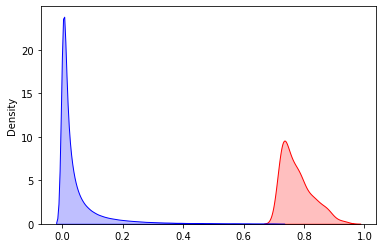

In [20]:

posnp = np.array(pos_probs)
negnp = np.array(neg_probs)
p1=sns.kdeplot(data=posnp, shade=True, color="r")
p1=sns.kdeplot(data=negnp, shade=True, color="b")



The positive examples are shown in red and the negative examples in blue. The separation is of course
an expected result. 
We can calculate some values to estimate some threshold probabilities for predictions.

In [21]:
print("Minimum prob, positive group:", np.min(posnp))
print("Maximum prob, positive group:", np.max(posnp))
print("prob at 1st percentile, positive group:", np.percentile(posnp, 1))
print("prob at 5th percentile, positive group:", np.percentile(posnp, 5))
print("prob at 10th percentile, positive group:", np.percentile(posnp, 20))
print("prob at 20th percentile, positive group:", np.percentile(posnp, 20))
print()
print("Minimum prob, negative group:", np.min(negnp))
print("Maximum prob, negative group:", np.max(negnp))
print("prob at 99th percentile, negative group:", np.percentile(negnp, 99))
print("prob at 95th percentile, negative group:", np.percentile(negnp, 95))
print("prob at 90th percentile, negative group:", np.percentile(negnp, 90))
print("prob at 80th percentile, negative group:", np.percentile(negnp, 80))

Minimum prob, positive group: 0.715
Maximum prob, positive group: 0.94
prob at 1st percentile, positive group: 0.7150159183673468
prob at 5th percentile, positive group: 0.72
prob at 10th percentile, positive group: 0.73
prob at 20th percentile, positive group: 0.73

Minimum prob, negative group: 0.0
Maximum prob, negative group: 0.715
prob at 99th percentile, negative group: 0.4550330921220358
prob at 95th percentile, negative group: 0.22042872714070444
prob at 90th percentile, negative group: 0.1328372647920484
prob at 80th percentile, negative group: 0.06590052398315782
